In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def get_total_times(paths, protocol='tcp'):
  total_times = []

  for path in paths:
      # Get a list of all csv files in the specified directory
      files = [f for f in os.listdir(path) if f.endswith('.csv')]

      # Read the csv files and store them in a list of dataframes
      dataframes = [pd.read_csv(os.path.join(path, f)) for f in files]

      # Ensure all dataframes have the same number of rows
      assert all(df.shape[0] == dataframes[0].shape[0] for df in dataframes), "Not all CSVs have the same number of rows"

      # Concatenate all dataframes vertically
      df_concatenated = pd.concat(dataframes)

      # Convert the timeTaken to seconds (assuming it's currently in seconds)
      df_concatenated['timeTaken'] = df_concatenated['timeTaken'] / 1e9

      # Group by the index (which is the same across all original dataframes) and compute mean
      df_mean = df_concatenated.groupby(df_concatenated.index).mean()

      # Extract the folder name from the path
      folder_name = os.path.basename(os.path.normpath(path))

      # Write to new CSV without index
      df_mean.to_csv(f'./average_times_{protocol}_{folder_name}.csv', index=False)

      # Compute the sum of timeTaken and add it to the list
      total_times.append(df_mean['timeTaken'].sum())
  
  return total_times

  

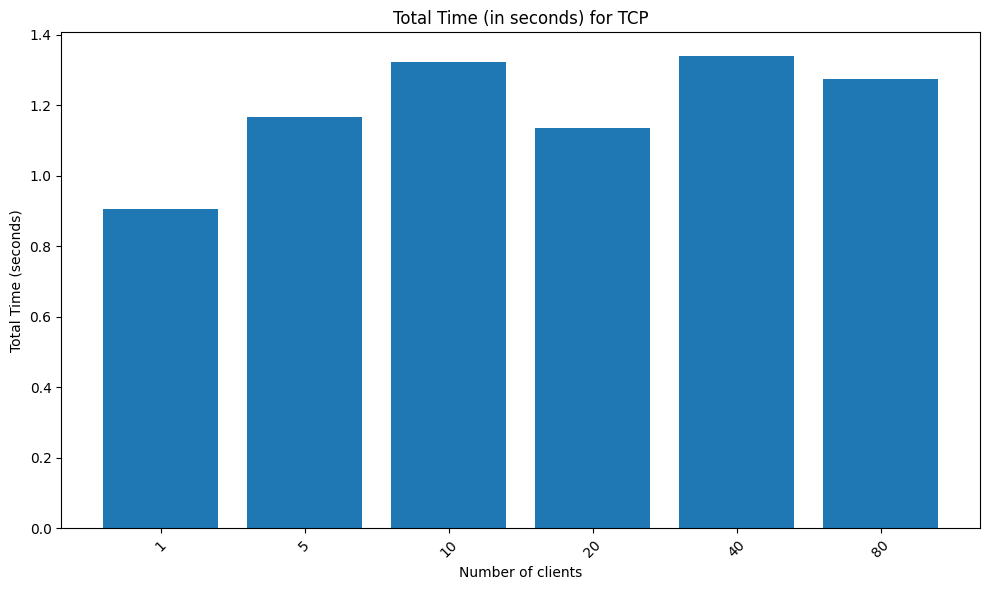

In [4]:
# List of paths
paths = [
    '../tcp/samples/data1',
    '../tcp/samples/data5',
    '../tcp/samples/data10',
    '../tcp/samples/data20',
    '../tcp/samples/data40',
    '../tcp/samples/data80'
]

pathsLabels = [
    '1',
    '5',
    '10',
    '20',
    '40',
    '80'
]

total_times = get_total_times(paths)

# Plot the total time taken for each path
plt.figure(figsize=(10,6))
plt.bar(pathsLabels, total_times)
plt.title('Total Time (in seconds) for TCP')
plt.xlabel('Number of clients')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 15, 0.5, dtype=float))
plt.tight_layout()
plt.show()


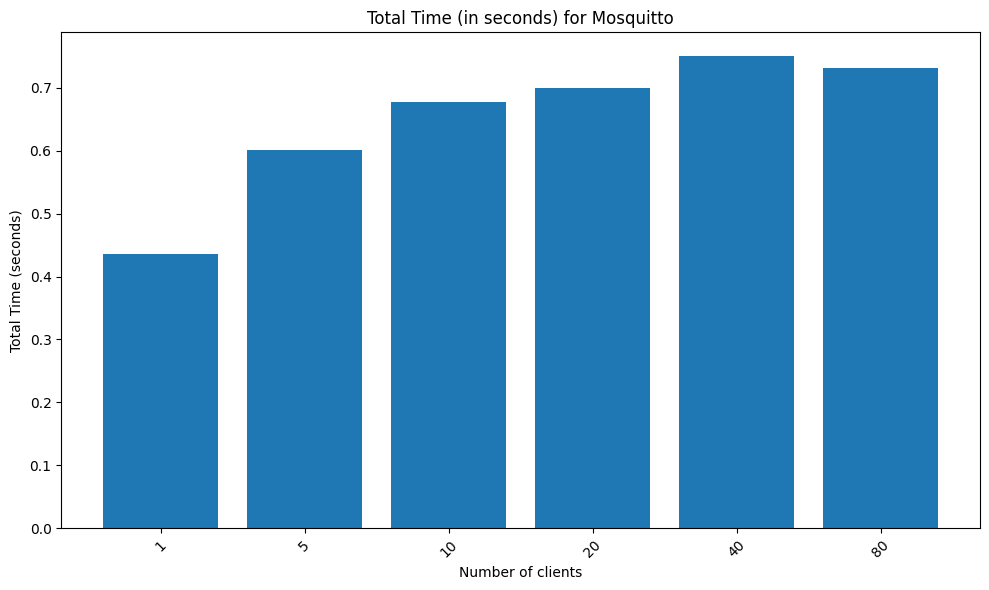

In [7]:
# List of paths
paths = [
    '../mqtt/samples/data1',
    '../mqtt/samples/data5',
    '../mqtt/samples/data10',
    '../mqtt/samples/data20',
    '../mqtt/samples/data40',
    '../mqtt/samples/data80'
]

pathsLabels = [
    '1',
    '5',
    '10',
    '20',
    '40',
    '80'
]

total_times = get_total_times(paths, 'mqtt')

# Plot the total time taken for each path
plt.figure(figsize=(10,6))
plt.bar(pathsLabels, total_times)
plt.title('Total Time (in seconds) for Mosquitto')
plt.xlabel('Number of clients')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
# plt.yticks(np.arange(0, 15, 0.5, dtype=float))
plt.tight_layout()
plt.show()


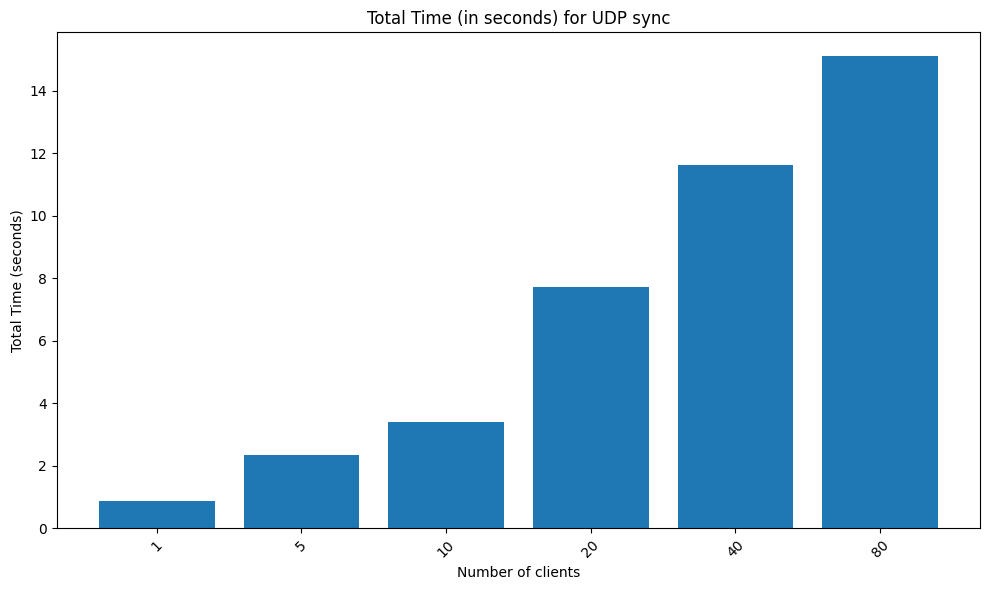

In [14]:
# List of paths
paths = [
    '../udp/samples/sync/data1',
    '../udp/samples/sync/data5',
    '../udp/samples/sync/data10',
    '../udp/samples/sync/data20',
    '../udp/samples/sync/data40',
    '../udp/samples/sync/data80'
]

pathsLabels = [
    '1',
    '5',
    '10',
    '20',
    '40',
    '80'
]

total_times = get_total_times(paths)

# Plot the total time taken for each path
plt.figure(figsize=(10,6))
plt.bar(pathsLabels, total_times)
plt.title('Total Time (in seconds) for UDP sync')
plt.xlabel('Number of clients')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


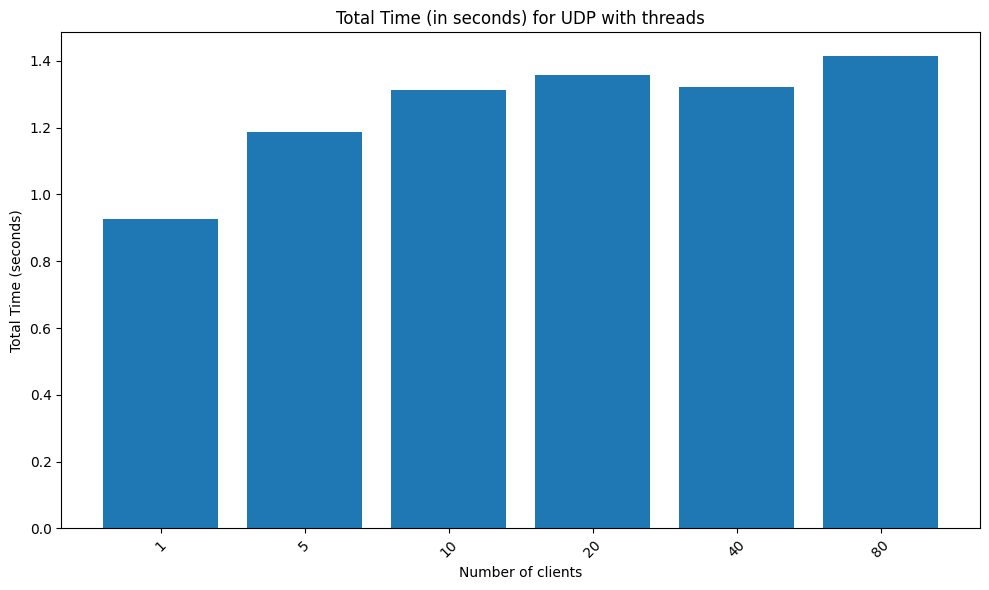

In [15]:
# List of paths
paths = [
    '../udp/samples/async/data1',
    '../udp/samples/async/data5',
    '../udp/samples/async/data10',
    '../udp/samples/async/data20',
    '../udp/samples/async/data40',
    '../udp/samples/async/data80'
]

pathsLabels = [
    '1',
    '5',
    '10',
    '20',
    '40',
    '80'
]

total_times = get_total_times(paths)

# Plot the total time taken for each path
plt.figure(figsize=(10,6))
plt.bar(pathsLabels, total_times)
plt.title('Total Time (in seconds) for UDP with threads')
plt.xlabel('Number of clients')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


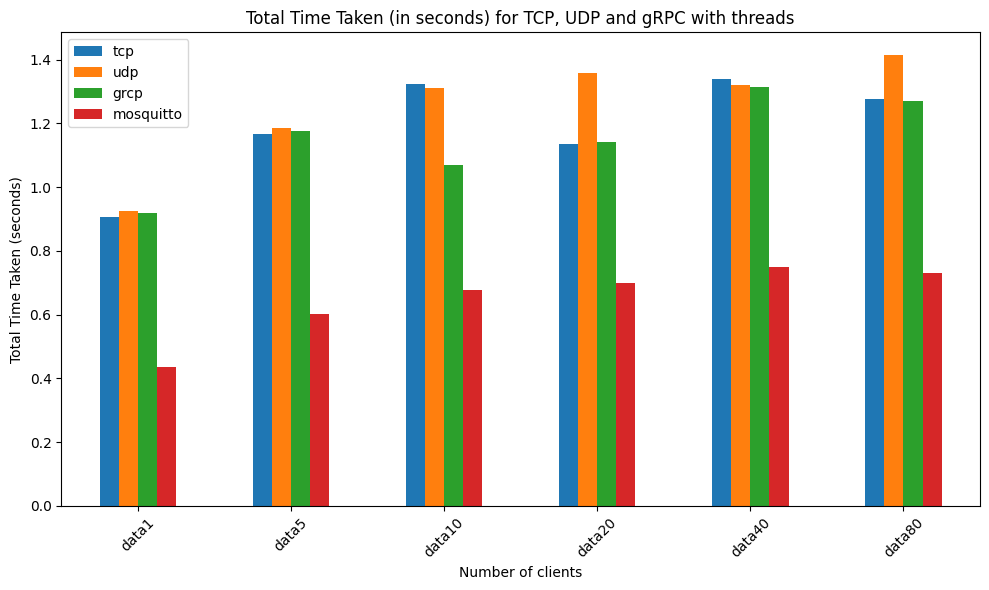

In [9]:
# List of paths for TCP and UDP
paths_dict = {
    'tcp': [
        '../tcp/samples/data1',
        '../tcp/samples/data5',
        '../tcp/samples/data10',
        '../tcp/samples/data20',
        '../tcp/samples/data40',
        '../tcp/samples/data80'
    ],
    'udp': [
        '../udp/samples/async/data1',
        '../udp/samples/async/data5',
        '../udp/samples/async/data10',
        '../udp/samples/async/data20',
        '../udp/samples/async/data40',
        '../udp/samples/async/data80'
    ],
    'grcp': [
        '../rpc/samples/data1',
        '../rpc/samples/data5',
        '../rpc/samples/data10',
        '../rpc/samples/data20',
        '../rpc/samples/data40',
        '../rpc/samples/data80'
    ],
    'mosquitto': [
        '../mqtt/samples/data1',
        '../mqtt/samples/data5',
        '../mqtt/samples/data10',
        '../mqtt/samples/data20',
        '../mqtt/samples/data40',
        '../mqtt/samples/data80'
    ]
}

# DataFrame to hold total times
total_times_df = pd.DataFrame()

for protocol, paths in paths_dict.items():
    total_times = []
    for path in paths:
        # Get a list of all csv files in the specified directory
        files = [f for f in os.listdir(path) if f.endswith('.csv')]

        # Read the csv files and store them in a list of dataframes
        dataframes = [pd.read_csv(os.path.join(path, f)) for f in files]

        # Ensure all dataframes have the same number of rows
        assert all(df.shape[0] == dataframes[0].shape[0] for df in dataframes), "Not all CSVs have the same number of rows"

        # Concatenate all dataframes vertically
        df_concatenated = pd.concat(dataframes)

        # Convert the timeTaken to seconds (assuming it's currently in nanoseconds)
        df_concatenated['timeTaken'] = df_concatenated['timeTaken'] / 1e9

        # Group by the index (which is the same across all original dataframes) and compute mean
        df_mean = df_concatenated.groupby(df_concatenated.index).mean()

        # Extract the folder name from the path
        folder_name = os.path.basename(os.path.normpath(path))

        # Write to new CSV without index
        df_mean.to_csv(f'./average_times_{protocol}_{folder_name}.csv', index=False)

        # Compute the sum of timeTaken and add it to the list
        total_times.append(df_mean['timeTaken'].sum())

    # Add total times to DataFrame
    total_times_df[protocol] = total_times

# Plot the total time taken for each path
total_times_df.plot(kind='bar', figsize=(10, 6))
plt.title('Total Time Taken (in seconds) for TCP, UDP and gRPC with threads')
plt.xlabel('Number of clients')
plt.ylabel('Total Time Taken (seconds)')
plt.xticks(range(len(paths_dict['tcp'])), [os.path.basename(os.path.normpath(path)) for path in paths_dict['tcp']], rotation=45)
plt.tight_layout()
plt.show()


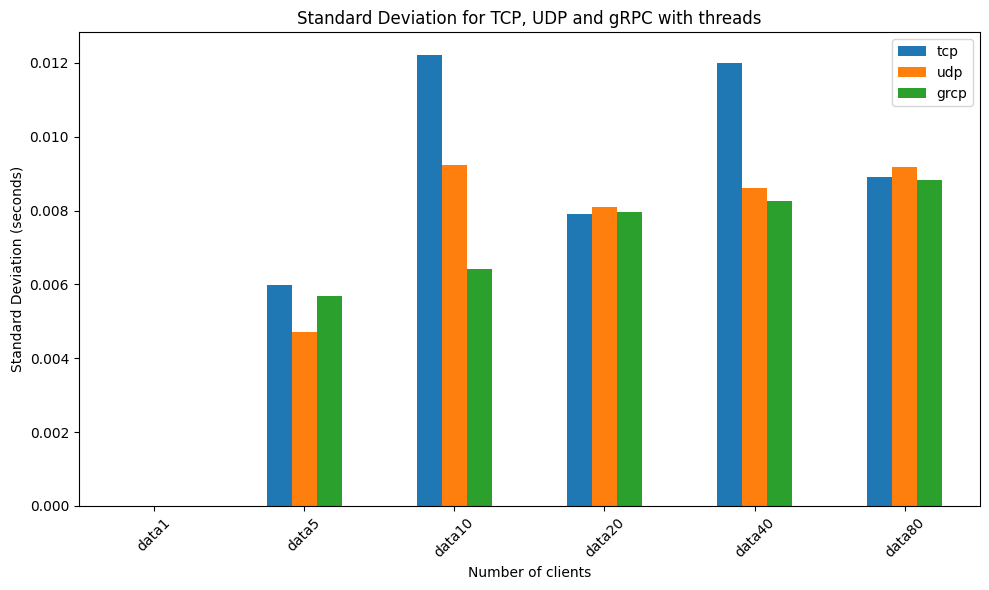

In [21]:
# List of paths for TCP and UDP
paths_dict = {
    'tcp': [
        '../tcp/samples/data1',
        '../tcp/samples/data5',
        '../tcp/samples/data10',
        '../tcp/samples/data20',
        '../tcp/samples/data40',
        '../tcp/samples/data80'
    ],
    'udp': [
        '../udp/samples/async/data1',
        '../udp/samples/async/data5',
        '../udp/samples/async/data10',
        '../udp/samples/async/data20',
        '../udp/samples/async/data40',
        '../udp/samples/async/data80'
    ],
    'grcp': [
        '../rpc/samples/data1',
        '../rpc/samples/data5',
        '../rpc/samples/data10',
        '../rpc/samples/data20',
        '../rpc/samples/data40',
        '../rpc/samples/data80'
    ]
}

# DataFrame to hold standard deviations
std_dev_df = pd.DataFrame()

for protocol, paths in paths_dict.items():
    std_devs = []
    for path in paths:
        # Get a list of all csv files in the specified directory
        files = [f for f in os.listdir(path) if f.endswith('.csv')]

        # Read the csv files and store them in a list of dataframes
        dataframes = [pd.read_csv(os.path.join(path, f)) for f in files]

        # Ensure all dataframes have the same number of rows
        assert all(df.shape[0] == dataframes[0].shape[0] for df in dataframes), "Not all CSVs have the same number of rows"

        # Concatenate all dataframes vertically
        df_concatenated = pd.concat(dataframes)

        # Convert the timeTaken to seconds (assuming it's currently in nanoseconds)
        df_concatenated['timeTaken'] = df_concatenated['timeTaken'] / 1e9

        # Group by the index (which is the same across all original dataframes) and compute standard deviation
        df_std = df_concatenated.groupby(df_concatenated.index).std()

        # Extract the folder name from the path
        folder_name = os.path.basename(os.path.normpath(path))

        # Write to new CSV without index
        df_std.to_csv(f'./std_dev_{protocol}_{folder_name}.csv', index=False)

        # Compute the standard deviation of timeTaken and add it to the list
        std_devs.append(df_std['timeTaken'].mean())

    # Add standard deviations to DataFrame
    std_dev_df[protocol] = std_devs

# Plot the standard deviation for each path
std_dev_df.plot(kind='bar', figsize=(10, 6))
plt.title('Standard Deviation for TCP, UDP and gRPC with threads')
plt.xlabel('Number of clients')
plt.ylabel('Standard Deviation (seconds)')
plt.xticks(range(len(paths_dict['tcp'])), [os.path.basename(os.path.normpath(path)) for path in paths_dict['tcp']], rotation=45)
plt.tight_layout()
plt.show()



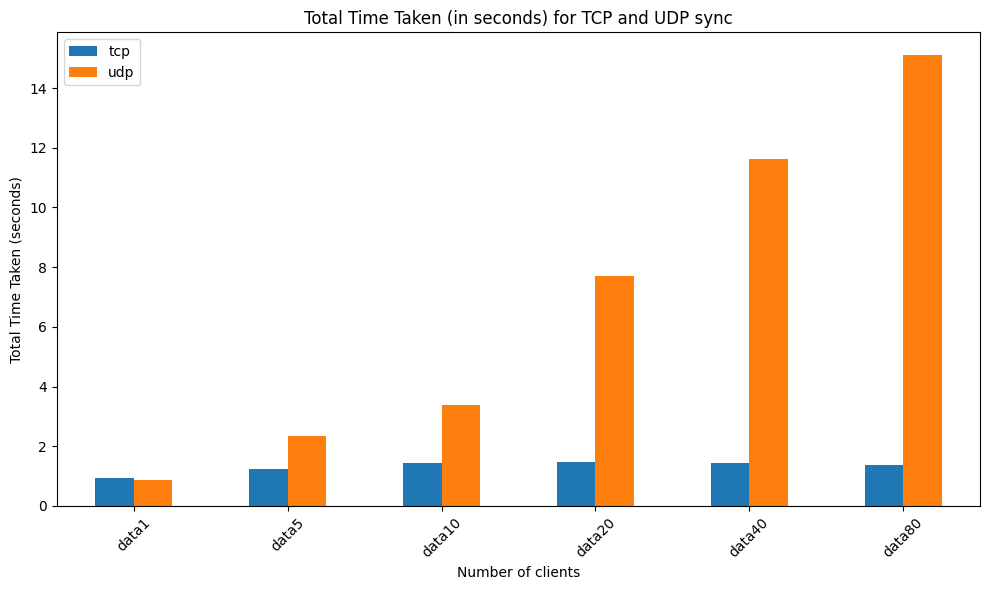

In [18]:
# List of paths for TCP and UDP
paths_dict = {
    'tcp': [
        '../tcp/samples/data1',
        '../tcp/samples/data5',
        '../tcp/samples/data10',
        '../tcp/samples/data20',
        '../tcp/samples/data40',
        '../tcp/samples/data80'
    ],
    'udp': [
        '../udp/samples/sync/data1',
        '../udp/samples/sync/data5',
        '../udp/samples/sync/data10',
        '../udp/samples/sync/data20',
        '../udp/samples/sync/data40',
        '../udp/samples/sync/data80'
    ]
}

# DataFrame to hold total times
total_times_df = pd.DataFrame()

for protocol, paths in paths_dict.items():
    total_times = []
    for path in paths:
        # Get a list of all csv files in the specified directory
        files = [f for f in os.listdir(path) if f.endswith('.csv')]

        # Read the csv files and store them in a list of dataframes
        dataframes = [pd.read_csv(os.path.join(path, f)) for f in files]

        # Ensure all dataframes have the same number of rows
        assert all(df.shape[0] == dataframes[0].shape[0] for df in dataframes), "Not all CSVs have the same number of rows"

        # Concatenate all dataframes vertically
        df_concatenated = pd.concat(dataframes)

        # Convert the timeTaken to seconds (assuming it's currently in nanoseconds)
        df_concatenated['timeTaken'] = df_concatenated['timeTaken'] / 1e9

        # Group by the index (which is the same across all original dataframes) and compute mean
        df_mean = df_concatenated.groupby(df_concatenated.index).mean()

        # Extract the folder name from the path
        folder_name = os.path.basename(os.path.normpath(path))

        # Write to new CSV without index
        df_mean.to_csv(f'./average_times_{protocol}_{folder_name}.csv', index=False)

        # Compute the sum of timeTaken and add it to the list
        total_times.append(df_mean['timeTaken'].sum())

    # Add total times to DataFrame
    total_times_df[protocol] = total_times

# Plot the total time taken for each path
total_times_df.plot(kind='bar', figsize=(10, 6))
plt.title('Total Time Taken (in seconds) for TCP and UDP sync')
plt.xlabel('Number of clients')
plt.ylabel('Total Time Taken (seconds)')
plt.xticks(range(len(paths_dict['tcp'])), [os.path.basename(os.path.normpath(path)) for path in paths_dict['tcp']], rotation=45)
plt.tight_layout()
plt.show()


In [19]:
def check_csvs(directory):
    # Get a list of all csv files in the specified directory
    files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Ensure there's at least one CSV
    if not files:
        print(f"No CSV files found in {directory}")
        return

    # Read the first CSV file
    df_first = pd.read_csv(os.path.join(directory, files[0]))

    # Store the first two columns
    first_two_columns_first_file = df_first[df_first.columns[:2]]

    # Check all other CSVs
    for file in files[1:]:
        # Read the CSV file
        df = pd.read_csv(os.path.join(directory, file))

        # Compare the first two columns to those of the first file
        if not df[df.columns[:2]].equals(first_two_columns_first_file):
            print(f"File {file} does not have the same first two columns as {files[0]}")
            return

    print(f"All CSV files in {directory} have the same input and output.")

In [20]:
# List of paths
paths = [
    '../tcp/samples/data1',
    '../tcp/samples/data5',
    '../tcp/samples/data10',
    '../tcp/samples/data20',
    '../tcp/samples/data40',
    '../tcp/samples/data80',
    '../udp/samples/async/data1',
    '../udp/samples/async/data5',
    '../udp/samples/async/data10',
    '../udp/samples/async/data20',
    '../udp/samples/async/data40',
    '../udp/samples/async/data80'
]

# Check all directories
for path in paths:
    check_csvs(path)

All CSV files in ../tcp/samples/data1 have the same input and output.
All CSV files in ../tcp/samples/data5 have the same input and output.
All CSV files in ../tcp/samples/data10 have the same input and output.
All CSV files in ../tcp/samples/data20 have the same input and output.
All CSV files in ../tcp/samples/data40 have the same input and output.
All CSV files in ../tcp/samples/data80 have the same input and output.
All CSV files in ../udp/samples/async/data1 have the same input and output.
All CSV files in ../udp/samples/async/data5 have the same input and output.
All CSV files in ../udp/samples/async/data10 have the same input and output.
All CSV files in ../udp/samples/async/data20 have the same input and output.
All CSV files in ../udp/samples/async/data40 have the same input and output.
All CSV files in ../udp/samples/async/data80 have the same input and output.
